In [1]:
import json
import os
import argparse
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
from hyperparams import STRATEGY
from PLP.DSL import *
from strategy_demonstrations import make_modified_env
from decision_tree_imitation_learning import solve_mouselab
from scipy import stats

import experiment_df_functions as edf
import experiment_participant_analysis as epa
from importlib import reload

In [26]:
# import
with open('data/dataclipsExp1.json', 'r') as handle:
    data = json.load(handle)
    
df_valid_all = pd.read_csv('csv/Exp1/df_valid_all.csv')
df_valid = pd.read_csv('csv/Exp1/df_valid.csv')

In [4]:
reload(edf)

<module 'experiment_df_functions' from '/Users/fbecker/Desktop/Exp1-2/experiment_df_functions.py'>

In [3]:
# ------ set also in epa
MAX_BONUS = 0.65
AGREEMENT_TYPE = 'clicks'
BONUS_RATE = 0.02
NUM_TESTING_TRIALS = 10
COND0 = 0
COND1 = 1

pd.set_option('display.max_rows', 181)
pd.set_option('display.max_columns', 80)

In [4]:
#set up
plp_tree = eval('lambda st, act : ((among(st, act, lambda st, act:  not(is_observed(st, act)) ,  lambda st, act, lst: has_largest_depth(st, act, lst) ) and not (is_previous_observed_max(st, act))))')
data_dict = edf.json2dict(data)
dataframe = edf.makeDataframe(data_dict)

Aborted Experiment: Less than 10 testing trials
Aborted Experiment: Less than 10 testing trials
Aborted Experiment: Less than 10 testing trials
Aborted Experiment: Less than 10 testing trials
Aborted Experiment: Less than 10 testing trials
Aborted Experiment: Less than 10 testing trials


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
print(len(dataframe))
dataframe.sort_values(by=['status'], ascending=False)

181


,WorkerId,hitId,assignmentId,condition,condition_type,beginHit,beginExp,endHit,totalTime,attempts,genEdu,comEdu,age,gender,qUnd,qDes,feedback,cheatTrials,status,numberClicks,rews_exp,rews_exp_total,rews_exp_mean,datastring
0,0,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3IKZ72A5B5NAW71FEP34ADNRV2JFNH,0,experimental,2020-02-23 19:41:45.204572,2020-02-23 19:53:26.441751,None,-,-,-,-,-,-,-,-,-,4,6,[],[],0.0,NaN,"{'condition': 0, 'counterbalance': 0, 'assignm..."
2,2,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3IXEICO793QC8RDOASMCP6G6RL1T6S,0,experimental,2020-02-23 18:55:49.093753,2020-02-23 19:02:42.777228,None,-,0,Follow a strategy of clicking in the Tree of C...,By understanding the strategy conveyed by the ...,-,-,-,-,-,0,6,"[12, 4, 5, 5, 4, 1, 6, 1, 6, 6]","[18, 44, 43, 43, 44, 47, 18, 47, 42, 18]",364.0,36.40,"{'condition': 0, 'counterbalance': 0, 'assignm..."
3,3,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,39LNWE0K4V371ONECYLBR5SDJQ3UIE,0,experimental,2020-02-23 18:36:42.805811,2020-02-23 18:48:51.051383,None,-,-,-,-,-,-,-,-,-,1,6,[],[],0.0,NaN,"{'condition': 0, 'counterbalance': 0, 'assignm..."
4,4,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3FTF2T8WLSPRIRJG34UZW0E7LGR9W9,0,experimental,2020-02-23 19:08:15.012101,2020-02-23 19:16:58.234358,None,-,0,Follow a strategy of clicking in the Tree of C...,By understanding the strategy conveyed by the ...,-,-,-,-,-,0,6,"[12, 12, 4, 5, 2, 6, 6, 11, 4, 1]","[10, 36, 40, 47, 46, 18, 42, 15, 44, 47]",345.0,34.50,"{'condition': 0, 'counterbalance': 0, 'assignm..."
5,5,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3WETL7AQWUFBQ6FGQU6GFNY81RD537,0,experimental,2020-02-23 18:28:12.801385,2020-02-23 18:35:30.808268,None,-,0,Follow a strategy of clicking in the Tree of C...,By understanding the strategy conveyed by the ...,-,-,-,-,-,10,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.00,"{'condition': 0, 'counterbalance': 0, 'assignm..."
6,6,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3PMBY0YE28AI4TDBMDUYK674T0AC94,1,control,2020-02-23 19:30:27.505092,2020-02-23 19:34:59.265097,None,-,-,-,-,-,-,-,-,-,8,6,[],[],0.0,NaN,"{'condition': 1, 'counterbalance': 0, 'assignm..."
7,7,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3JW0YLFXRUN2UNWOWF4RAKMIJHCWWM,1,control,2020-02-23 19:17:16.972149,2020-02-23 19:22:28.585982,None,-,-,-,-,-,-,-,-,-,5,6,[],[],0.0,NaN,"{'condition': 1, 'counterbalance': 0, 'assignm..."
8,8,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3FTF2T8WLSPRIRJG34UZW0E7LGT9WB,1,control,2020-02-23 21:01:41.403043,2020-02-23 21:04:50.000914,None,-,1,College degree,Yes,25,female,-,-,,2,6,"[0, 0, 3, 1, 1, 1, 1, 4, 1, 6]","[0, 0, 45, 23, 23, 47, 23, 44, 47, 18]",270.0,27.00,"{'condition': 1, 'counterbalance': 0, 'assignm..."
1,1,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3TDXMTX3CC1MZDXDGGN8BZEXG4M6IP,0,experimental,2020-02-23 18:59:43.479198,2020-02-23 19:05:59.222078,None,-,-,-,-,-,-,-,-,-,5,6,[],[],0.0,NaN,"{'condition': 0, 'counterbalance': 0, 'assignm..."
121,121,3SNR5F7R920OP8TYWV14Y3AJG3PEIS,3OCHAWUVGPRQON7XH6HAOS6U5C9XKK,1,control,2020-02-23 19:22:14.039435,2020-02-23 19:26:48.75544,2020-02-23 19:30:21.73041,487,1,High school graduate,No,51,Male,-,-,,1,4,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]","[-1, 3, 0, -1, -1, -1, 1, -1, 1, 1]",1.0,0.10,"{'condition': 1, 'counterbalance': 0, 'assignm..."


In [ ]:
# look into special cases:
#dataframe[dataframe.WorkerId == ""].datastring.tolist()

In [ ]:
# ............................Filter.................................................
# .............................................................................
# .............................................................................

In [7]:
# early quitter
df_valid_all =  dataframe[dataframe.status == 4]
df_valid_all.reset_index(inplace = True, drop=True)

In [ ]:
# ............................BONUS.................................................
# ..........................................................................................
# ..........................................................................................

In [ ]:
# early quitter
early_quitter_ids =  dataframe[dataframe.status != 4].WorkerId
early_quitter_bonus = []
for wid in early_quitter_ids :
    early_part = edf.df2listRow(dataframe[dataframe['WorkerId'] == wid].reset_index(drop=True))
    early_part_data, _, _, _, _ = epa.get_participant_data(early_part, 0)
    bon = epa.calculate_bonus(early_part_data, plp_tree, 1)
    early_quitter_bonus.append(bon)
    #print('{} (early quit): {}'.format(wid, bon))
    #print('\n'

In [ ]:
# calculate bonus with df_valid_all
c0 = edf.df2listRow( df_valid_all[df_valid_all.condition == COND0].reset_index(drop=True) )
c1 = edf.df2listRow( df_valid_all[df_valid_all.condition == COND1].reset_index(drop=True) )
bonus_info = epa.print_input_for_bonus_payment((c0, c1), plp_tree)

In [ ]:
# bonus stats:
print(np.mean(bonus_info['bonuses']))
print(np.min(bonus_info['bonuses']))
print(np.max(bonus_info['bonuses']))

In [ ]:
# add bonus 
dataframe = edf.joinColumnToDf(dataframe, bonus_info['workerIDs']+early_quitter_ids, 'WorkerId', bonus_info['bonuses']+early_quitter_bonus, 'Bonus')
df_valid_all = edf.joinColumnToDf(df_valid_all, bonus_info['workerIDs'], 'WorkerId', bonus_info['bonuses'], 'Bonus') 


In [ ]:
# compute final bonus regarding min wage
delta_bonus = edf.getDeltaBonus(df_valid_all , 0.15, 4)

In [ ]:
# compute total bonus
df_valid_all['delta_bonus'] = delta_bonus.tolist()
df_valid_all["total_bonus"] = df_valid_all['Bonus'] + df_valid_all['delta_bonus']

In [ ]:
edf.exportBonus(df_valid_all, total_bonus = True, early_quitter_ids, early_quitter_bonus)

In [ ]:
df_valid_all.sort_values(by=['Bonus'], ascending=False)

In [ ]:
# ............................ Results .....................................................
# ..........................................................................................
# ..........................................................................................

In [ ]:
df_valid_all = pd.read_csv('csv/Exp1/df_valid_all.csv')
df_valid = pd.read_csv('csv/Exp1/df_valid.csv')

In [24]:
# filter dataframe
df_valid = df_valid_all[df_valid_all.cheatTrials <= 9]
df_valid.reset_index(inplace = True, drop=True)

# filter control condition
condition_notree_dict = df_valid[(df_valid.condition == COND1)]
condition_notree_dict = edf.df2listRow(condition_notree_dict.reset_index(drop=True))

# filter experimental condition
condition_tree_dict = df_valid[(df_valid.condition == COND0)]
condition_tree_dict = edf.df2listRow(condition_tree_dict.reset_index(drop=True))

In [ ]:
results_info = epa.print_statistics((condition_tree_dict, condition_notree_dict), plp_tree, add_info = '_cheat9')

In [ ]:
df_valid.insert(len(df_valid.columns),  'pair_agreement',  results_info['pair_agreement'])
df_valid.insert(len(df_valid.columns),  'seq_agreement',  results_info['seq_agreement'])
df_valid.insert(len(df_valid.columns),  'total_rew',  results_info['total_rew'])
df_valid.insert(len(df_valid.columns),  'mean_rew',  results_info['mean_rew'])

In [27]:
df0 = df_valid[df_valid.condition == 0]
df1 = df_valid[df_valid.condition == 1]

In [28]:
epa.print_statistics2(df0, df1, 'pair_agreement')

 -- df1 -- 
Mean: 0.6698427355332028
Std: 0.281947155863111

 -- df2 -- 
Mean: 0.4686481549584751
Std: 0.2580772953124344

 -- test-- 
t: 4.632485348443971, p_val: 7.605303493374955e-06
u: 1774.5, p_val: 2.239859027748198e-06



In [29]:
epa.print_statistics2(df0, df1, 'rews_exp_total')

 -- df1 -- 
Mean: 344.746835443038
Std: 118.54374488774552

 -- df2 -- 
Mean: 284.1025641025641
Std: 133.30335461795306

 -- test-- 
t: 2.9938287357774422, p_val: 0.003207500005125875
u: 2110.0, p_val: 0.00032796038868630674



In [277]:
#testing
print(stats.pearsonr(df_valid.rews_exp_total.tolist(), df_valid.pair_agreement.tolist() ))

(0.8160442953248425, 9.784972769570696e-39)


In [253]:
print(len(df0[df0.pair_agreement > 0.5])/len(df0))
print(len(df1[df1.pair_agreement > 0.5])/len(df1))

0.7088607594936709
0.46153846153846156


In [ ]:
# ............................ Stats .....................................................
# ..........................................................................................
# ..........................................................................................

In [ ]:
# print answers
#epa.print_cond0_answers(condition_tree_dict)

#df_valid_all[df_valid_all.condition == 0].qUnd.tolist()
#df_valid_all[df_valid_all.condition == 0].qDes.tolist()
#df_valid_all[df_valid_all.condition == 0].feedback.tolist()

In [ ]:
# calculate mean time 
tt = [int(a) for a in df_valid_all['totalTime'].to_list() if a != '-']
print(np.mean(tt) / 60)

In [ ]:
# calculate mean age:

# typos
df_valid_all.age[33] = 21
df_valid_all.age[47] = '-'
df_valid_all.age[140] = 36
df_valid_all.age[169] = 52

age_temp = df_valid_all[df_valid_all.age != '-' ].age.astype(int)

print( np.mean( age_temp ) )
print( np.min( age_temp ) )
print( np.max( age_temp ) )

In [ ]:
# calculate gender:
gender_temp = df_valid_all[ df_valid_all.gender != '-'].gender.str.lower().str.contains("f")

print(np.sum(gender_temp))

In [249]:
#number excluded 
len(df_valid_all) - len(df_valid)

15

In [ ]:
#number valid
print(len(df_valid[ df_valid.condition == COND0]))
print(len(df_valid[ df_valid.condition == COND1]))

In [ ]:
# stats attempts
print(df_valid_all.attempts.min())
print(df_valid_all.attempts.max())
print(df_valid_all.attempts.mean())

In [ ]:
# stats genEdu
df_valid_all.groupby('genEdu')['WorkerId'].nunique()

In [ ]:
# stats comEdu
df_valid_all.groupby('comEdu')['WorkerId'].nunique()

In [ ]:
# ............................ Plots .....................................................
# ..........................................................................................
# ..........................................................................................

[0.1, 0.30000000000000004, 0.5, 0.7, 0.9]


Text(0, 0.5, 'Proportion of participants')

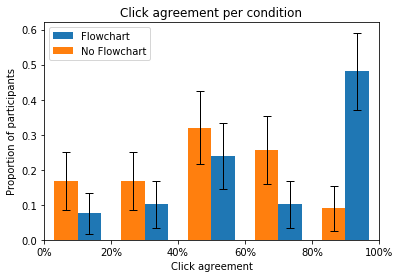

In [280]:
epa.create_barplot2(df0, df1, 'pair_agreement', [0 , 0.2, 0.4, 0.6, 0.8, 1])
plt.legend()
plt.xticks([0., 0.2, 0.4,  0.6,  0.8,  1], labels=['0%', '20%','40%', '60%', '80%','100%'])
plt.title('Click agreement per condition')
plt.xlabel('Click agreement')
plt.ylabel('Proportion of participants')
#plt.savefig('plots/exp1_ca.png', dpi=300)

[-22.0, -6.0, 10.0, 26.0, 42.0]


Text(0, 0.5, 'Proportion of participants')

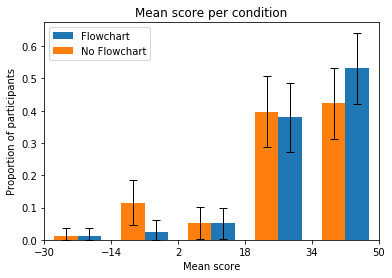

In [282]:
epa.create_barplot2(df0, df1, 'mean_rew', [-30., -14.,   2.,  18.,  34.,  50.])
plt.legend()
plt.title('Mean score per condition')
plt.xlabel('Mean score')
plt.ylabel('Proportion of participants')
#plt.savefig('plots/exp1_mr.png', dpi=300)

In [259]:
max(df_valid.rews_exp_mean) # -1, 46 -> diff47 -> 50 [-2,8,18,28,38,48]

45.6

[3.0, 13.0, 23.0, 33.0, 43.0]


Text(0, 0.5, 'Proportion of participants')

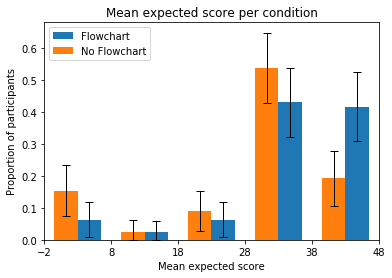

In [284]:
epa.create_barplot2(df0, df1, 'rews_exp_mean', [-2,8,18,28,38,48])
plt.legend()
plt.title('Mean expected score per condition')
plt.xlabel('Mean expected score')
plt.ylabel('Proportion of participants')
#plt.savefig('plots/exp1_emr.png', dpi=300)

(array([16.,  3.,  4., 17., 25., 19., 17., 11., 22., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

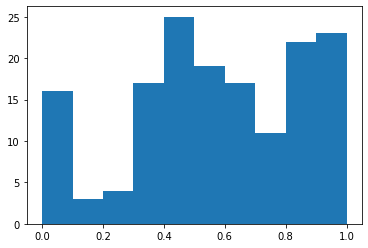

In [234]:
plt.hist(df_valid.pair_agreement)

(array([ 2.,  2.,  7.,  6.,  3.,  4., 18., 41., 51., 23.]),
 array([-20.3 , -13.49,  -6.68,   0.13,   6.94,  13.75,  20.56,  27.37,  34.18,  40.99,  47.8 ]),
 <a list of 10 Patch objects>)

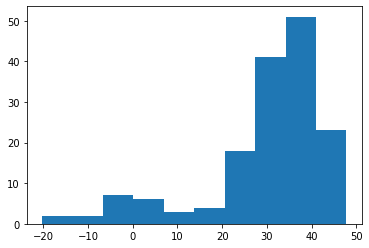

In [235]:
plt.hist(df_valid.mean_rew)

(array([17.,  2.,  6., 31., 70., 30.,  0.,  0.,  0.,  1.]),
 array([-10. ,  71.9, 153.8, 235.7, 317.6, 399.5, 481.4, 563.3, 645.2, 727.1, 809. ]),
 <a list of 10 Patch objects>)

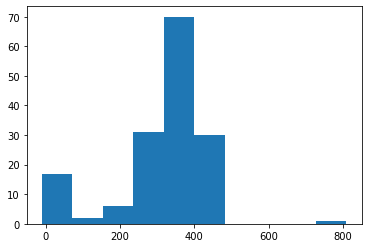

In [22]:
plt.hist(df_valid.rews_exp_total)

In [ ]:
# ............................ Stroring .....................................................
# ..........................................................................................
# ..........................................................................................

In [19]:
df_valid_all.to_csv('csv/Exp1/df_valid_all.csv')
df_valid.to_csv('csv/Exp1/df_valid.csv') 

In [ ]:
# ............................ Testing .....................................................
# ..........................................................................................
# ..........................................................................................

In [265]:
34.47/39.97

0.8623967975981987

In [267]:
25.33/30.14

0.8404114134041141

In [269]:
5.95/9.33

0.6377277599142551